In [2]:
from keras.applications import VGG16
conv_base = VGG16(
                weights = "imagenet",
                include_top = False,
                input_shape = (150,150,3))

58892288/58889256 [==============================] - 258s 4us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:/Users/asif1/Git/Deep_Learning/DATA/cat_dog_small'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

In [8]:
#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

#Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

#Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

#Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

#Directory with test cat pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 500
total training dog images: 500
total validation cat images: 250
total validation dog images: 250
total test cat images: 250
total test dog images: 250


In [16]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20
def extract_features(directory,sample_count):
    features = np.zeros(shape= (sample_count,4,4,512))
    labels  = np.zeros(shape= (sample_count))
    generator= datagen.flow_from_directory(
                                    directory,
                                    target_size=(150,150),
                                    batch_size = batch_size,
                                    class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features,labels

In [17]:
train_features, train_labels = extract_features(train_dir,1000)

Found 1000 images belonging to 2 classes.


In [18]:
test_features, test_labels = extract_features(test_dir,500)

Found 500 images belonging to 2 classes.


In [19]:
validation_features, validation_labels = extract_features(validation_dir,500)

Found 500 images belonging to 2 classes.


In [20]:
train_features = np.reshape(train_features, (1000, 4 * 4 * 512))


In [21]:
validation_features = np.reshape(validation_features, (500, 4 * 4 * 512))


In [22]:
test_features = np.reshape(test_features, (500, 4 * 4 * 512))

In [23]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
50/50 [==============================] - 3s 47ms/step - loss: 0.6721 - acc: 0.6084 - val_loss: 0.5336 - val_acc: 0.7720
Epoch 2/30
50/50 [==============================] - 2s 34ms/step - loss: 0.5258 - acc: 0.7409 - val_loss: 0.4598 - val_acc: 0.8100
Epoch 3/30
50/50 [==============================] - 2s 34ms/step - loss: 0.4429 - acc: 0.8036 - val_loss: 0.4161 - val_acc: 0.8380
Epoch 4/30
50/50 [==============================] - 2s 34ms/step - loss: 0.3701 - acc: 0.8526 - val_loss: 0.3901 - val_acc: 0.8380
Epoch 5/30
50/50 [==============================] - 2s 34ms/step - loss: 0.3390 - acc: 0.8710 - val_loss: 0.3609 - val_acc: 0.8480
Epoch 6/30
50/50 [==============================] - 2s 35ms/step - loss: 0.3162 - acc: 0.8840 - val_loss: 0.3671 - val_acc: 0.8420
Epoch 7/30
50/50 [==============================] - 2s 38ms/step - loss: 0.2721 - acc: 0.9018 - val_loss: 0.3405 - val_acc: 0.8600
Epoch 8/30
50/50 [==============================] - 2s 35ms/step - loss: 0.2525 - a

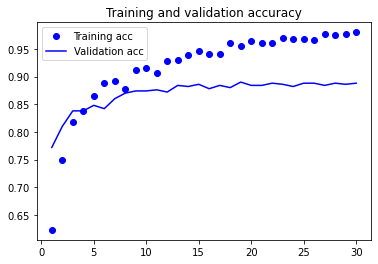

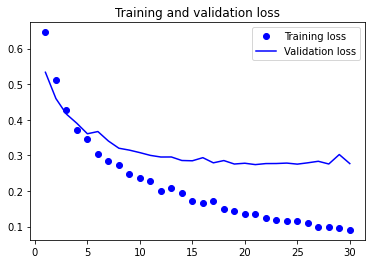

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [27]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [29]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)   

validation_generator = test_datagen.flow_from_directory(
                                        validation_dir,
                                        target_size=(150, 150),
                                        batch_size=20,
                                        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
            metrics=['acc'])

In [38]:
history = model.fit(
                train_generator,
                steps_per_epoch=50,
                epochs=20,
                validation_data=validation_generator,
                validation_steps=25)

C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 612s 12s/step - loss: 0.5284 - acc: 0.7750 - val_loss: 0.4766 - val_acc: 0.7940
Epoch 2/20
50/50 [==============================] - 645s 13s/step - loss: 0.4835 - acc: 0.7770 - val_loss: 0.4323 - val_acc: 0.8240
Epoch 3/20
50/50 [==============================] - 646s 13s/step - loss: 0.4545 - acc: 0.7960 - val_loss: 0.4037 - val_acc: 0.8260
Epoch 4/20
50/50 [==============================] - 1180s 15s/step - loss: 0.4289 - acc: 0.8080 - val_loss: 0.3914 - val_acc: 0.8280
Epoch 5/20
50/50 [==============================] - 847s 17s/step - loss: 0.4029 - acc: 0.8270 - val_loss: 0.3806 - val_acc: 0.8400
Epoch 6/20
50/50 [==============================] - 857s 17s/step - loss: 0.3967 - acc: 0.8160 - val_loss: 0.3573 - val_acc: 0.8400
Epoch 7/20
50/50 [==============================] - 850s 17s/step - loss: 0.3847 - acc: 0.8370 - val_loss: 0.3477 - val_acc: 0.8460
Epoch 8/20
50/50 [==============================] - 858s 17s/step - loss: 0

In [39]:
model.save('cats_and_dogs_VGG16_with_augmentation.h5')

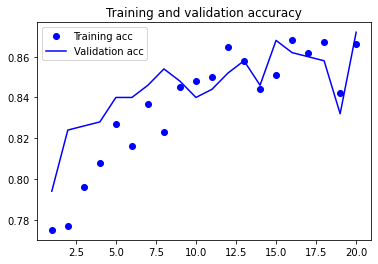

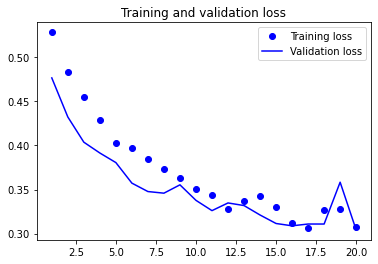

In [40]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
steps_per_epoch = len(train_features)//batch_size
steps_per_epoch

50

In [37]:
validation_steps = len(validation_features)//batch_size # if you have test data
validation_steps

25

In [41]:
test_generator = test_datagen.flow_from_directory(
                                    test_dir,
                                    target_size=(150, 150),
                                    batch_size=1,
                                    class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 500 images belonging to 2 classes.
500/500 [==============================] - 218s 437ms/step - loss: 0.2631 - acc: 0.8880
test acc: 0.8880000114440918
